# Importing  Libraries

In [1]:
import os
print(os.getcwd())  
import os
files_in_directory = os.listdir()
print(files_in_directory)
# <h5 style="color:grey ">  </h5>


c:\Users\kaifk\lpth\.vscode\data_science_project\UpSkill-Campus-Internship\Prediction of Agriculture Crop Production In India
['Crop_Prediction._datafile2.ipynb', 'Crop_Prediction._datafile_3.ipynb', 'crop_prediction_datafile1.ipynb', 'crop_prediction_datafile4ipynb.ipynb', 'datafile _4.csv', 'datafile.csv', 'datafile_2.csv', 'datafile_3.csv', 'datafile_5.csv', 'datasets', 'decision_tree', 'predicted_model.ipynb', 'prediction-of-agriculture-crop-production-in-india.ipynb', 'produce.csv']


In [2]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
#for evaluation 
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
df=pd.read_csv('datafile.csv')

In [4]:
df

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [5]:
df.shape

(13, 9)

In [6]:
df.columns #reshaping 


Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')

In [7]:
df.dropna(inplace=True)


In [8]:
df

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [9]:
df.dtypes


Crop        object
2004-05    float64
2005-06    float64
2006-07    float64
2007-08    float64
2008-09    float64
2009-10    float64
2010-11    float64
2011-12    float64
dtype: object

In [10]:
df.isnull().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [11]:
df.describe()


,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000


# Data Preprocessing and Exploratory Data Analysis

In [12]:
df1=df

In [13]:
crop_data = df.drop(columns='Crop')
correlation_matrix = crop_data.corr()

In [14]:
type(df['Crop'].iloc[0])

str

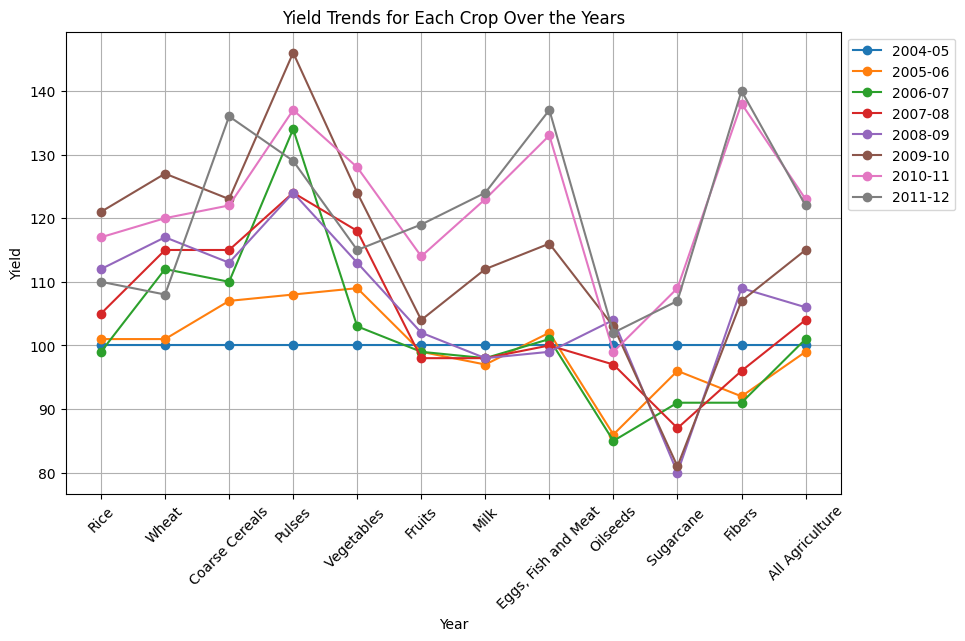

In [15]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy.set_index('Crop', inplace=True)
plt.figure(figsize=(10, 6))
for crop in df_copy.columns:
    plt.plot(df_copy.index, df_copy[crop], marker='o', label=crop)

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield Trends for Each Crop Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

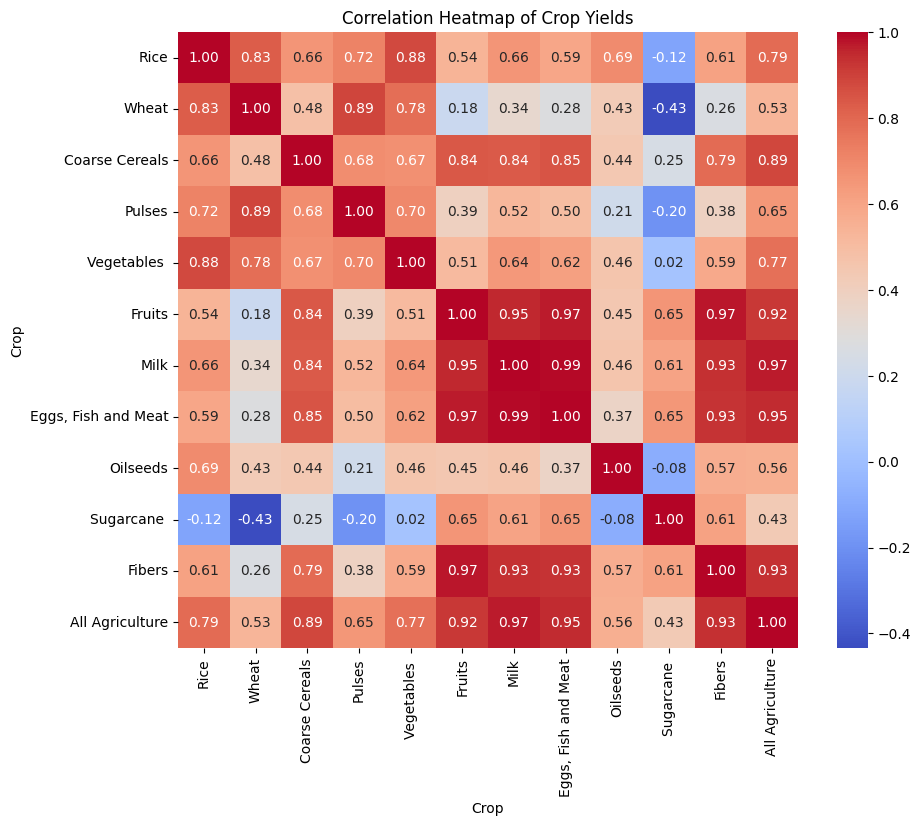

In [16]:
df = df.set_index('Crop')
crop_data_transposed = df.transpose()
correlation_matrix = crop_data_transposed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Crop Yields")
plt.show()

In [17]:
df

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
Crop,,,,,,,,
Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0


In [ ]:
df['Crop']=df['Crop'].map({'Rice':0,'Wheat':1,'Coarse Cereals':2,'Pulses':3,'Vegetables ':4,'Fruits':5,'Milk':6,
     'Eggs, Fish and Meat':7,'Oilseeds':8,'Sugarcane ':9,'Fibers':10,'All Agriculture':11})

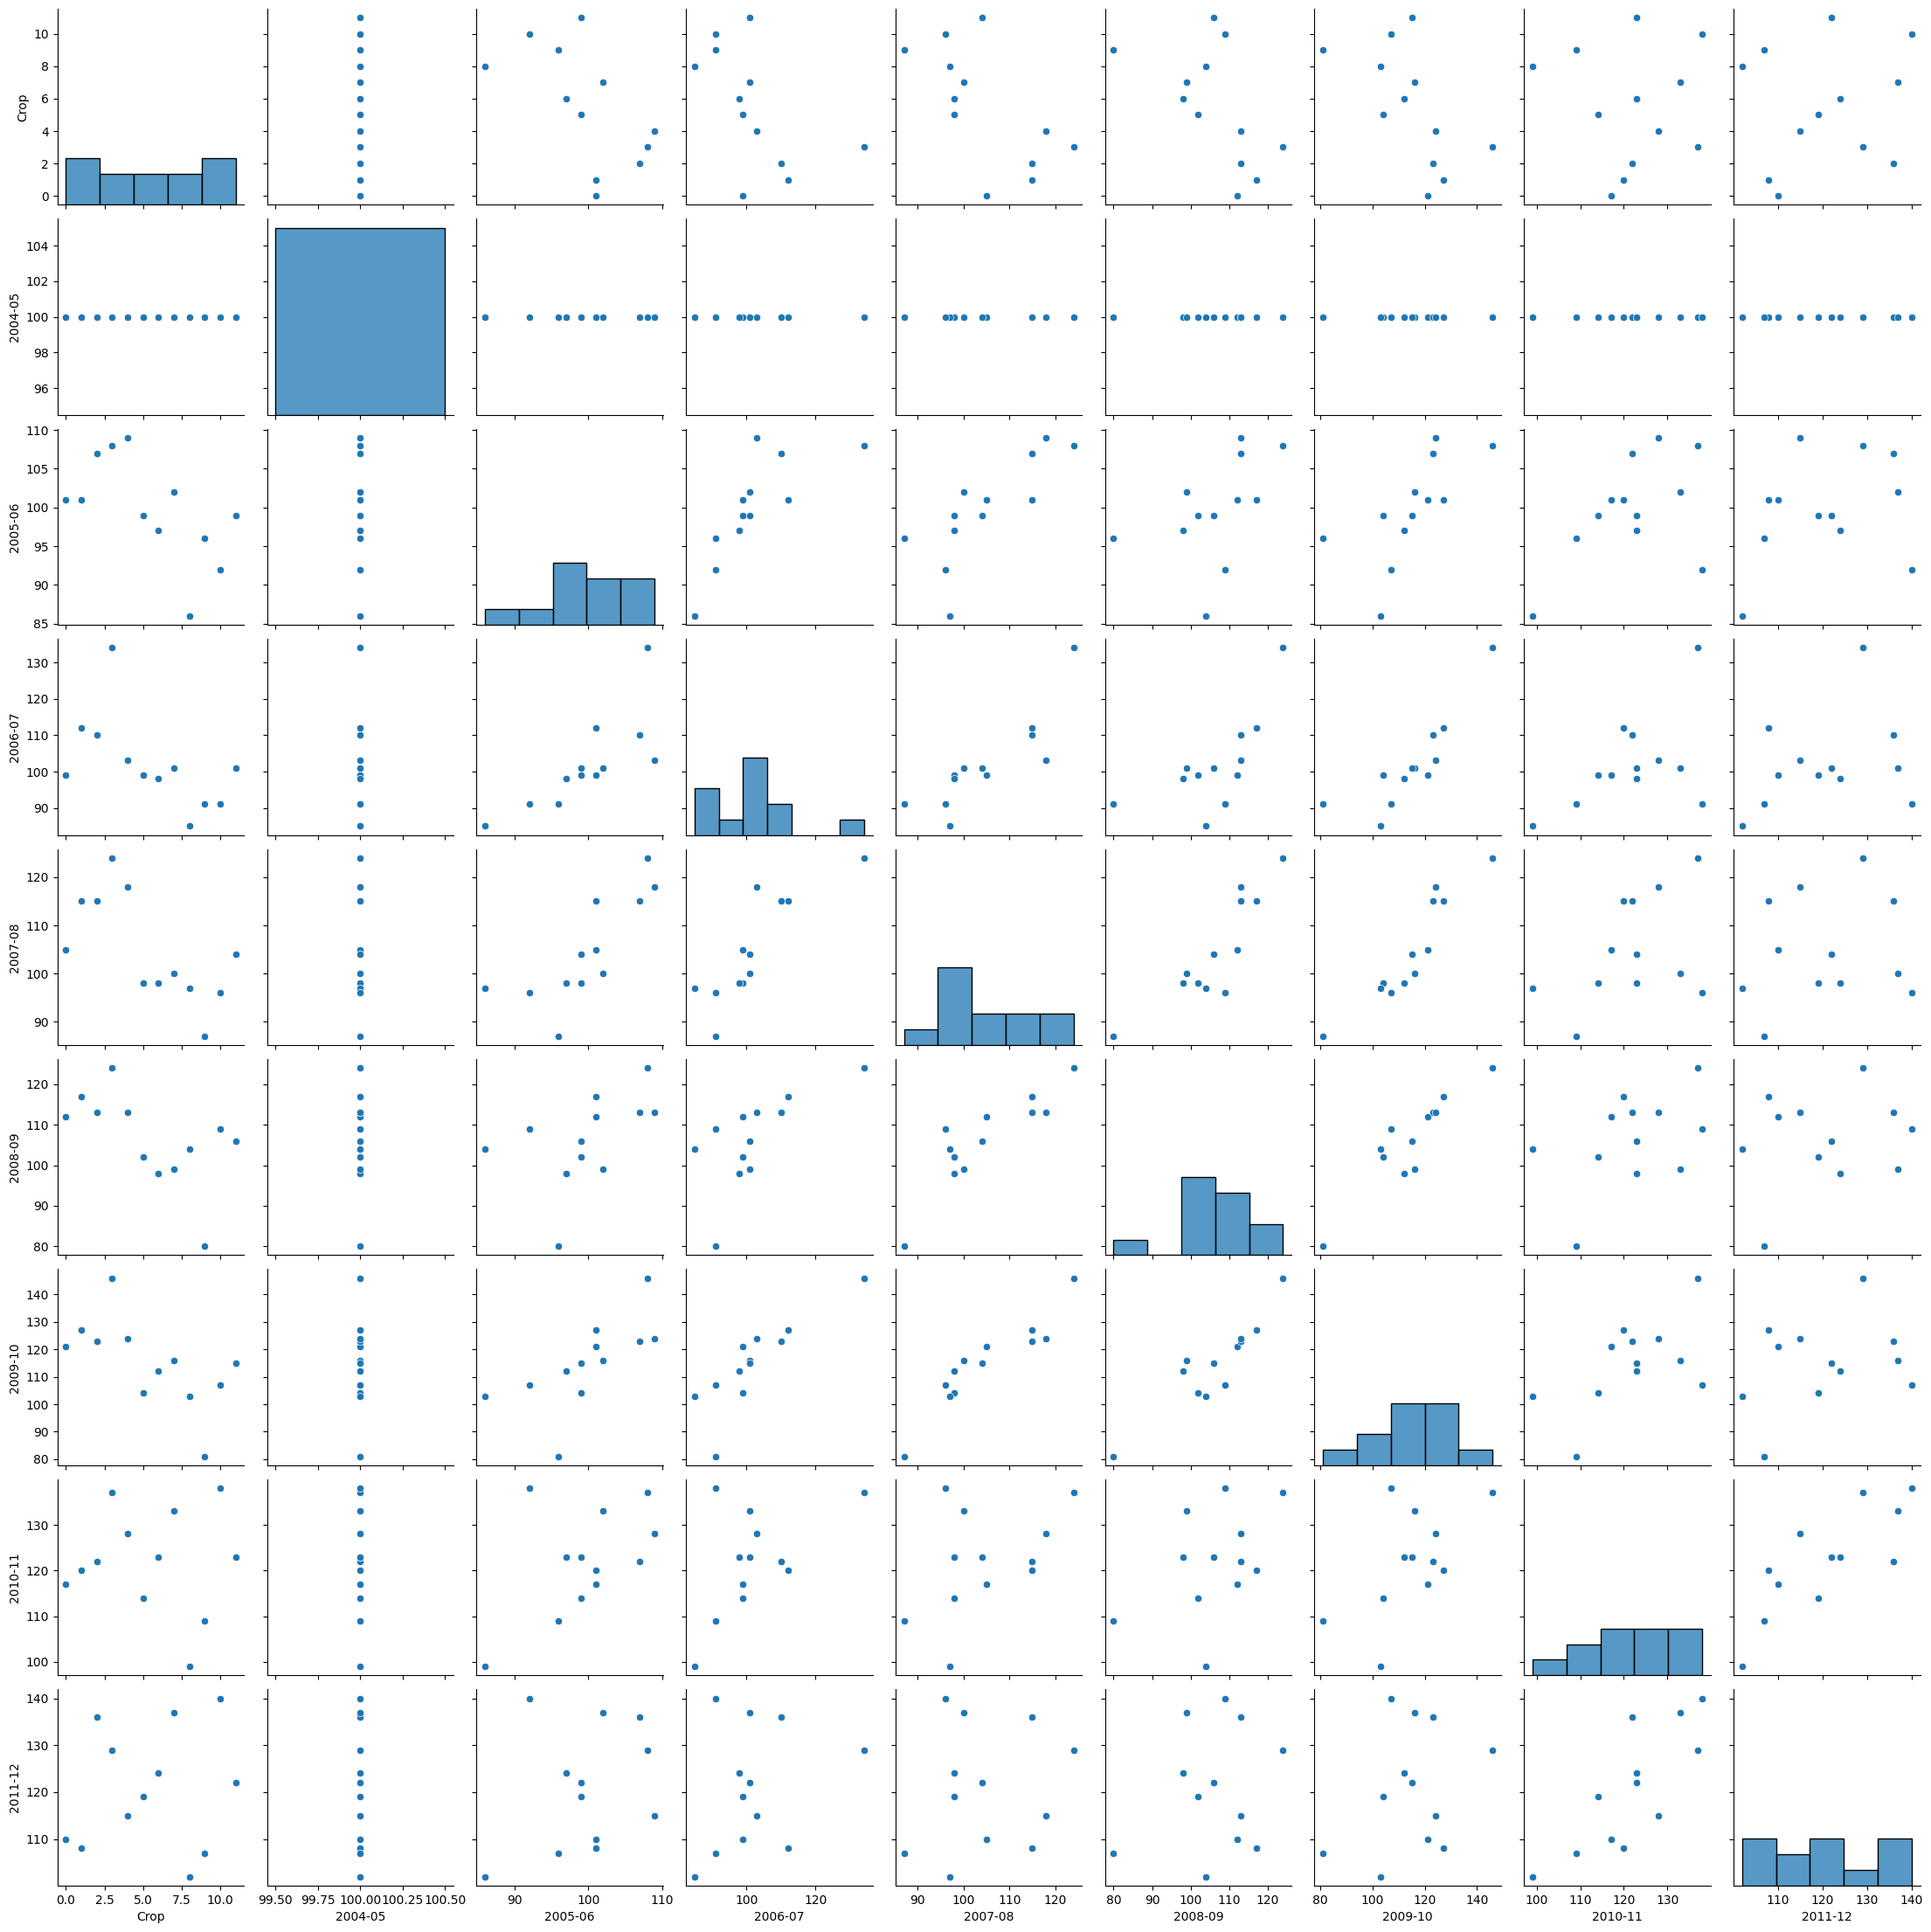

In [ ]:
sns.pairplot(df)

#droping the target value


In [ ]:
df

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
Crop,,,,,,,,
0,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0


In [ ]:
scalar

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


loading the target value


In [ ]:
target=df['Crop']

In [ ]:
target

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12     NaN
Name: Crop, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = df_t.drop(columns=["All Agriculture"]) 
y = df_t["All Agriculture"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.14786926  0.01566524  0.00386049  0.08031323  0.2193126   0.17164087
  0.2437839  -0.02220412  0.01468093 -0.03038948  0.23721368]
Intercept: 21.399192148039873


importing the algorithm



In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("predicted = "  ,y_pred,"r2 score: ", r2 ,"mean_squared", mse)

predicted =  [ 99.58205325 111.90305213] r2 score:  0.922422874030803 mean_squared 4.964936062028606
